# Deafult Loan Prediction Model

***

### Step 1: Import Python Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab
import seaborn as sns
import datetime
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import log_loss,roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score, plot_roc_curve, plot_precision_recall_curve
from imblearn.over_sampling  import SMOTE
from sklearn.preprocessing import PowerTransformer, MinMaxScaler, StandardScaler, QuantileTransformer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import pickle
pd.options.display.max_columns = 100
pd.options.mode.use_inf_as_na = True

### Step 2: Load Data

In [2]:
#Load the given csv files
dataset = pd.read_csv('../data/dataset(2).csv')

### Step 3: Data Exploration

In [3]:
#print the dimension of the dataset (rows,columns)
print("Shape of dataset table {}".format(dataset.shape))

Shape of dataset table (6246, 360)


In [244]:
#check number of columns and data types of features
dataset.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6246 entries, 0 to 6245
Data columns (total 360 columns):
 #    Column                Non-Null Count  Dtype  
---   ------                --------------  -----  
 0    decision_id           6246 non-null   object 
 1    label                 6246 non-null   object 
 2    default               4661 non-null   float64
 3    v1                    5046 non-null   float64
 4    v2                    6008 non-null   float64
 5    v3                    5999 non-null   float64
 6    v4                    5932 non-null   float64
 7    v5                    6008 non-null   float64
 8    v6                    5618 non-null   float64
 9    v7                    5932 non-null   float64
 10   v8                    5868 non-null   float64
 11   v9                    5932 non-null   float64
 12   v10                   5609 non-null   float64
 13   v11                   6008 non-null   float64
 14   v12                   6007 non-null   float64
 15   v1

In [245]:
dataset.head()

,decision_id,label,default,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30,v31,v32,v33,v34,v35,v36,v37,v38,v39,v40,v41,v42,v43,v44,v45,v46,v47,...,v308,v309,v310,v311,v312,v313,v314,v315,v316,v317,v318,v319,v320,v321,v322,v323,v324,v325,v326,v327,v328,v329,v330,v331,v332,v333,v334,v335,v336,v337,v338,v339,v340,v341,v342,v343,brand,carrier,device_name,gms_version,manufacturer,network_type,screen_height,screen_width,screen_dpi,rooted_device,rooted_device_custom,otp_autofill,allow_mock_locations,cloned_details
0,94dac214-e5d0-4758-b7ec-5a8e899b7f3e,modeling,0.0,0.0,41247.87,4526.83,0.0,73.0,15231.14,0.0,0.0,0.0,0.0,4583.33,1400.59,0.0,24.00,139.10,33.0,1.57,0.0,0.0,0.0,0.0,0.0,55121.00,800.0,0.0,0.0,0.76,531048.38,0.0,44448.88,0.23,1.04,0.0,0.0,0.0,0.0,6.0,158683.511600,8307.89,0.0,33006.40,0.0,1481.63,0.0,0.0,0.0,0.0,...,14500.00,0.0,0.0,150.27,1.0,0.0,570.0,0.0,0.0,0.21,0.0,0.0,0.0,599.14,13000.0,1406.89,0.0,0.0,0.0,0.0,0.00,53115.04,0.20,0.0,0.07,0.0,186.0,0.0,0.0,0.0,2.45,0.0,4583.33,14000.00,0.0,1282.10,OPPO,Jio 4G,OPPO CPH1931,21.02.14 (120406-352619232),OPPO,Unknown_0,1456.0,720.0,xhdpi,False,False,True,False,"{""cloned"":false}"
1,bcab40cd-4aaa-43d2-ae82-7d9ba2ded0a9,modeling,1.0,1.0,10278.99,35633.86,0.0,24.0,55549.52,0.0,0.0,0.0,0.0,1883.33,351.28,0.0,45381.52,2.00,6.0,1.26,0.0,0.0,0.0,0.0,0.0,23985.14,1860.0,0.0,0.0,0.82,83083.14,0.0,10521.63,0.12,1.14,0.0,0.0,0.0,0.0,0.0,2113.802462,28732.51,0.0,48840.27,0.0,401.55,0.0,0.0,0.0,0.0,...,500.00,0.0,0.0,61.75,4.0,0.0,320.0,0.0,0.0,0.09,0.0,0.0,0.0,260.71,11300.0,227.11,0.0,0.0,0.0,0.0,0.00,21083.00,0.07,0.0,0.17,4.0,280.0,0.0,500.0,0.0,1.09,0.0,2825.00,500.00,0.0,32497.34,OPPO,airtel,OPPO CPH1931,20.50.16 (120406-351607135),OPPO,Unknown_0,1456.0,720.0,xhdpi,False,False,True,NaN,NaN
2,c2f63ac4-e23c-40e7-8ef1-502c1d27df17,modeling,0.0,6.0,4603616.51,46242.48,0.0,354.0,542944.00,0.0,0.0,3.0,0.0,604414.36,30789.99,0.0,23708.39,50000.00,72.0,1.06,0.0,0.0,0.0,0.0,0.0,5634568.27,129495.0,0.0,0.0,NaN,5634568.27,0.0,4603616.51,9.32,0.97,0.0,0.0,0.0,48.0,59.0,776183.615900,276073.22,0.0,633661.62,0.0,153453.88,2.0,86567.0,0.0,0.0,...,765591.52,0.0,0.0,4183.56,8.0,0.0,24.0,0.0,0.0,1.93,0.0,0.0,0.0,61245.31,737300.0,15932.37,0.0,0.0,0.0,0.0,0.00,5831247.58,0.97,0.0,3.07,8.0,425.0,3.0,737300.0,0.0,1.17,0.0,9114.18,641726.52,0.0,120952.72,1cb6aef939f56e90,NaN,D8043bd139f034a8 1cb6aef93a8f1e32,20.36.15 (120400-333172415),d8043bd139f034a8,4G,1423.0,720.0,hdpi,False,False,NaN,NaN,NaN
3,dc8c2882-5868-470c-8669-9a7e87782a40,modeling,0.0,0.0,13656.98,15509.49,1.0,33.0,NaN,1.0,0.0,2.0,15000.0,935.67,491.30,0.0,NaN,24158.12,2.0,0.88,0.0,0.0,0.0,0.0,0.0,4043.00,0.0,1.0,0.0,0.20,90107.65,0.0,13075.83,0.18,0.44,0.0,0.0,0.0,0.0,0.0,8577.579649,NaN,0.0,22674.78,0.0,435.86,0.0,0.0,0.0,0.0,...,0.00,1.0,0.0,30.68,5.0,1.0,200.0,0.0,1.0,0.17,0.0,0.0,249.0,43.95,2000.0,223.88,0.0,1.0,0.0,0.0,233.67,9115.00,0.09,0.0,0.07,5.0,197.0,2.0,0.0,0.0,1.34,0.0,623.78,0.00,0.0,0.00,YU,airtel,YU5530,20.45.16 (040408-344294571),YU,4G,1776.0,1080.0,xxhdpi,False,False,True,False,NaN
4,e40e990a-e89c-43c5-b933-f2b096aa1d35,modeling,1.0,7.0,3532898.80,16363.64,0.0,363.0,542944.00,0.0,0.0,3.0,15000.0,405174.44,34803.92,0.0,30000.00,48585.00,73.0,1.87,0.0,0.0,0.0,0.0,0.0,6369117.75,185732.0,1.0,0.0,NaN,6369117.75,0.0,3532898.80,13.96,0.97,0.0,0.0,0.0,62.0,62.0,21332.385090,296151.27,0.0,296151.27,0.0,253644.02,5.0,45058.5,0.0,0.0,...,756325.62,1.0,0.0,4132.93,10.0,0.0,25.0,0.0,0.0,1.98,0.0,0.0,0.0,69229.54,731200.0,18018.43,0.0,0.0,0.0,1.0,0.00,6594744.44,0.99,0.0,4.20,10.0,423.0,3.0,731200.0,0.0,1.00,0.0,8897.95,756325.62,0.0,246793.10,943a681d922e77b,NaN,638b5f4f86dfed5d 943a681d9bc971d,20.36.15 (100300-333172415),638b5f4f86dfed5d,Wifi,1920.0,1080.0,xhdpi,NaN,NaN,NaN,NaN,NaN


In [4]:
#drop columns  not used in model training
dataset.drop(['decision_id'], axis = 1, inplace = True)
dataset.drop(['v38'], axis = 1, inplace = True)
dataset.drop(['v334'], axis = 1, inplace = True)
dataset.drop(dataset.columns[343:357], axis = 1, inplace = True)
dataset.drop(dataset[dataset.isnull().sum(axis=1)>100].index,axis=0,inplace=True)

In [247]:
dataset.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5975 entries, 0 to 6245
Data columns (total 343 columns):
 #    Column   Non-Null Count  Dtype  
---   ------   --------------  -----  
 0    label    5975 non-null   object 
 1    default  4481 non-null   float64
 2    v1       5045 non-null   float64
 3    v2       5975 non-null   float64
 4    v3       5967 non-null   float64
 5    v4       5925 non-null   float64
 6    v5       5975 non-null   float64
 7    v6       5594 non-null   float64
 8    v7       5925 non-null   float64
 9    v8       5861 non-null   float64
 10   v9       5925 non-null   float64
 11   v10      5608 non-null   float64
 12   v11      5975 non-null   float64
 13   v12      5974 non-null   float64
 14   v13      5925 non-null   float64
 15   v14      5889 non-null   float64
 16   v15      5975 non-null   float64
 17   v16      5975 non-null   float64
 18   v17      5892 non-null   float64
 19   v18      5608 non-null   float64
 20   v19      5608 non-null   flo

In [5]:
print("Shape of dataset table {}".format(dataset.shape))

Shape of dataset table (5975, 343)


In [6]:
dataset['default'].value_counts()

0.0    3456
1.0    1025
Name: default, dtype: int64

In [7]:
dataset['default'].isna().value_counts()

False    4481
True     1494
Name: default, dtype: int64

In [251]:
x_columns = [col for col in dataset.columns.tolist() if col not in  ['default']] 

In [252]:
y_column = ['default']

In [253]:
x_columns

['label',
 'v1',
 'v2',
 'v3',
 'v4',
 'v5',
 'v6',
 'v7',
 'v8',
 'v9',
 'v10',
 'v11',
 'v12',
 'v13',
 'v14',
 'v15',
 'v16',
 'v17',
 'v18',
 'v19',
 'v20',
 'v21',
 'v22',
 'v23',
 'v24',
 'v25',
 'v26',
 'v27',
 'v28',
 'v29',
 'v30',
 'v31',
 'v32',
 'v33',
 'v34',
 'v35',
 'v36',
 'v37',
 'v39',
 'v40',
 'v41',
 'v42',
 'v43',
 'v44',
 'v45',
 'v46',
 'v47',
 'v48',
 'v49',
 'v50',
 'v51',
 'v52',
 'v53',
 'v54',
 'v55',
 'v56',
 'v57',
 'v58',
 'v59',
 'v60',
 'v61',
 'v62',
 'v63',
 'v64',
 'v65',
 'v66',
 'v67',
 'v68',
 'v69',
 'v70',
 'v71',
 'v72',
 'v73',
 'v74',
 'v75',
 'v76',
 'v77',
 'v78',
 'v79',
 'v80',
 'v81',
 'v82',
 'v83',
 'v84',
 'v85',
 'v86',
 'v87',
 'v88',
 'v89',
 'v90',
 'v91',
 'v92',
 'v93',
 'v94',
 'v95',
 'v96',
 'v97',
 'v98',
 'v99',
 'v100',
 'v101',
 'v102',
 'v103',
 'v104',
 'v105',
 'v106',
 'v107',
 'v108',
 'v109',
 'v110',
 'v111',
 'v112',
 'v113',
 'v114',
 'v115',
 'v116',
 'v117',
 'v118',
 'v119',
 'v120',
 'v121',
 'v122',
 'v123',

In [8]:
train_test_data = dataset[dataset['default'].notna()].reset_index(drop=True)

In [9]:
train_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4481 entries, 0 to 4480
Columns: 343 entries, label to v343
dtypes: float64(342), object(1)
memory usage: 11.7+ MB


In [110]:
#for col in train_test_data.columns:
#    if col not in ['default']:
#        plt.figure(figsize=(10,5))
#        sns.histplot(train_test_data[col])
#        plt.xticks(rotation='vertical')
#        plt.show()

In [111]:
train_test_data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4481 entries, 0 to 4480
Data columns (total 343 columns):
 #    Column   Non-Null Count  Dtype  
---   ------   --------------  -----  
 0    label    4481 non-null   object 
 1    default  4481 non-null   float64
 2    v1       4481 non-null   float64
 3    v2       4481 non-null   float64
 4    v3       4481 non-null   float64
 5    v4       4481 non-null   float64
 6    v5       4481 non-null   float64
 7    v6       4481 non-null   float64
 8    v7       4481 non-null   float64
 9    v8       4481 non-null   float64
 10   v9       4481 non-null   float64
 11   v10      4481 non-null   float64
 12   v11      4481 non-null   float64
 13   v12      4481 non-null   float64
 14   v13      4481 non-null   float64
 15   v14      4481 non-null   float64
 16   v15      4481 non-null   float64
 17   v16      4481 non-null   float64
 18   v17      4481 non-null   float64
 19   v18      4481 non-null   float64
 20   v19      4481 non-null   flo

In [120]:
def plot_missing_values(df):
    """ For each column with missing values plot proportion that is missing."""
    data = [(col, df[col].isnull().sum() / len(df)) 
            for col in df.columns if df[col].isnull().sum() > 0]
    col_names = ['column', 'percent_missing']
    missing_df = pd.DataFrame(data, columns=col_names).sort_values('percent_missing')
    pylab.rcParams['figure.figsize'] = (50, 70)
    missing_df.plot(kind='barh', x='column', y='percent_missing'); 
    plt.title('Percent of missing values in colummns');

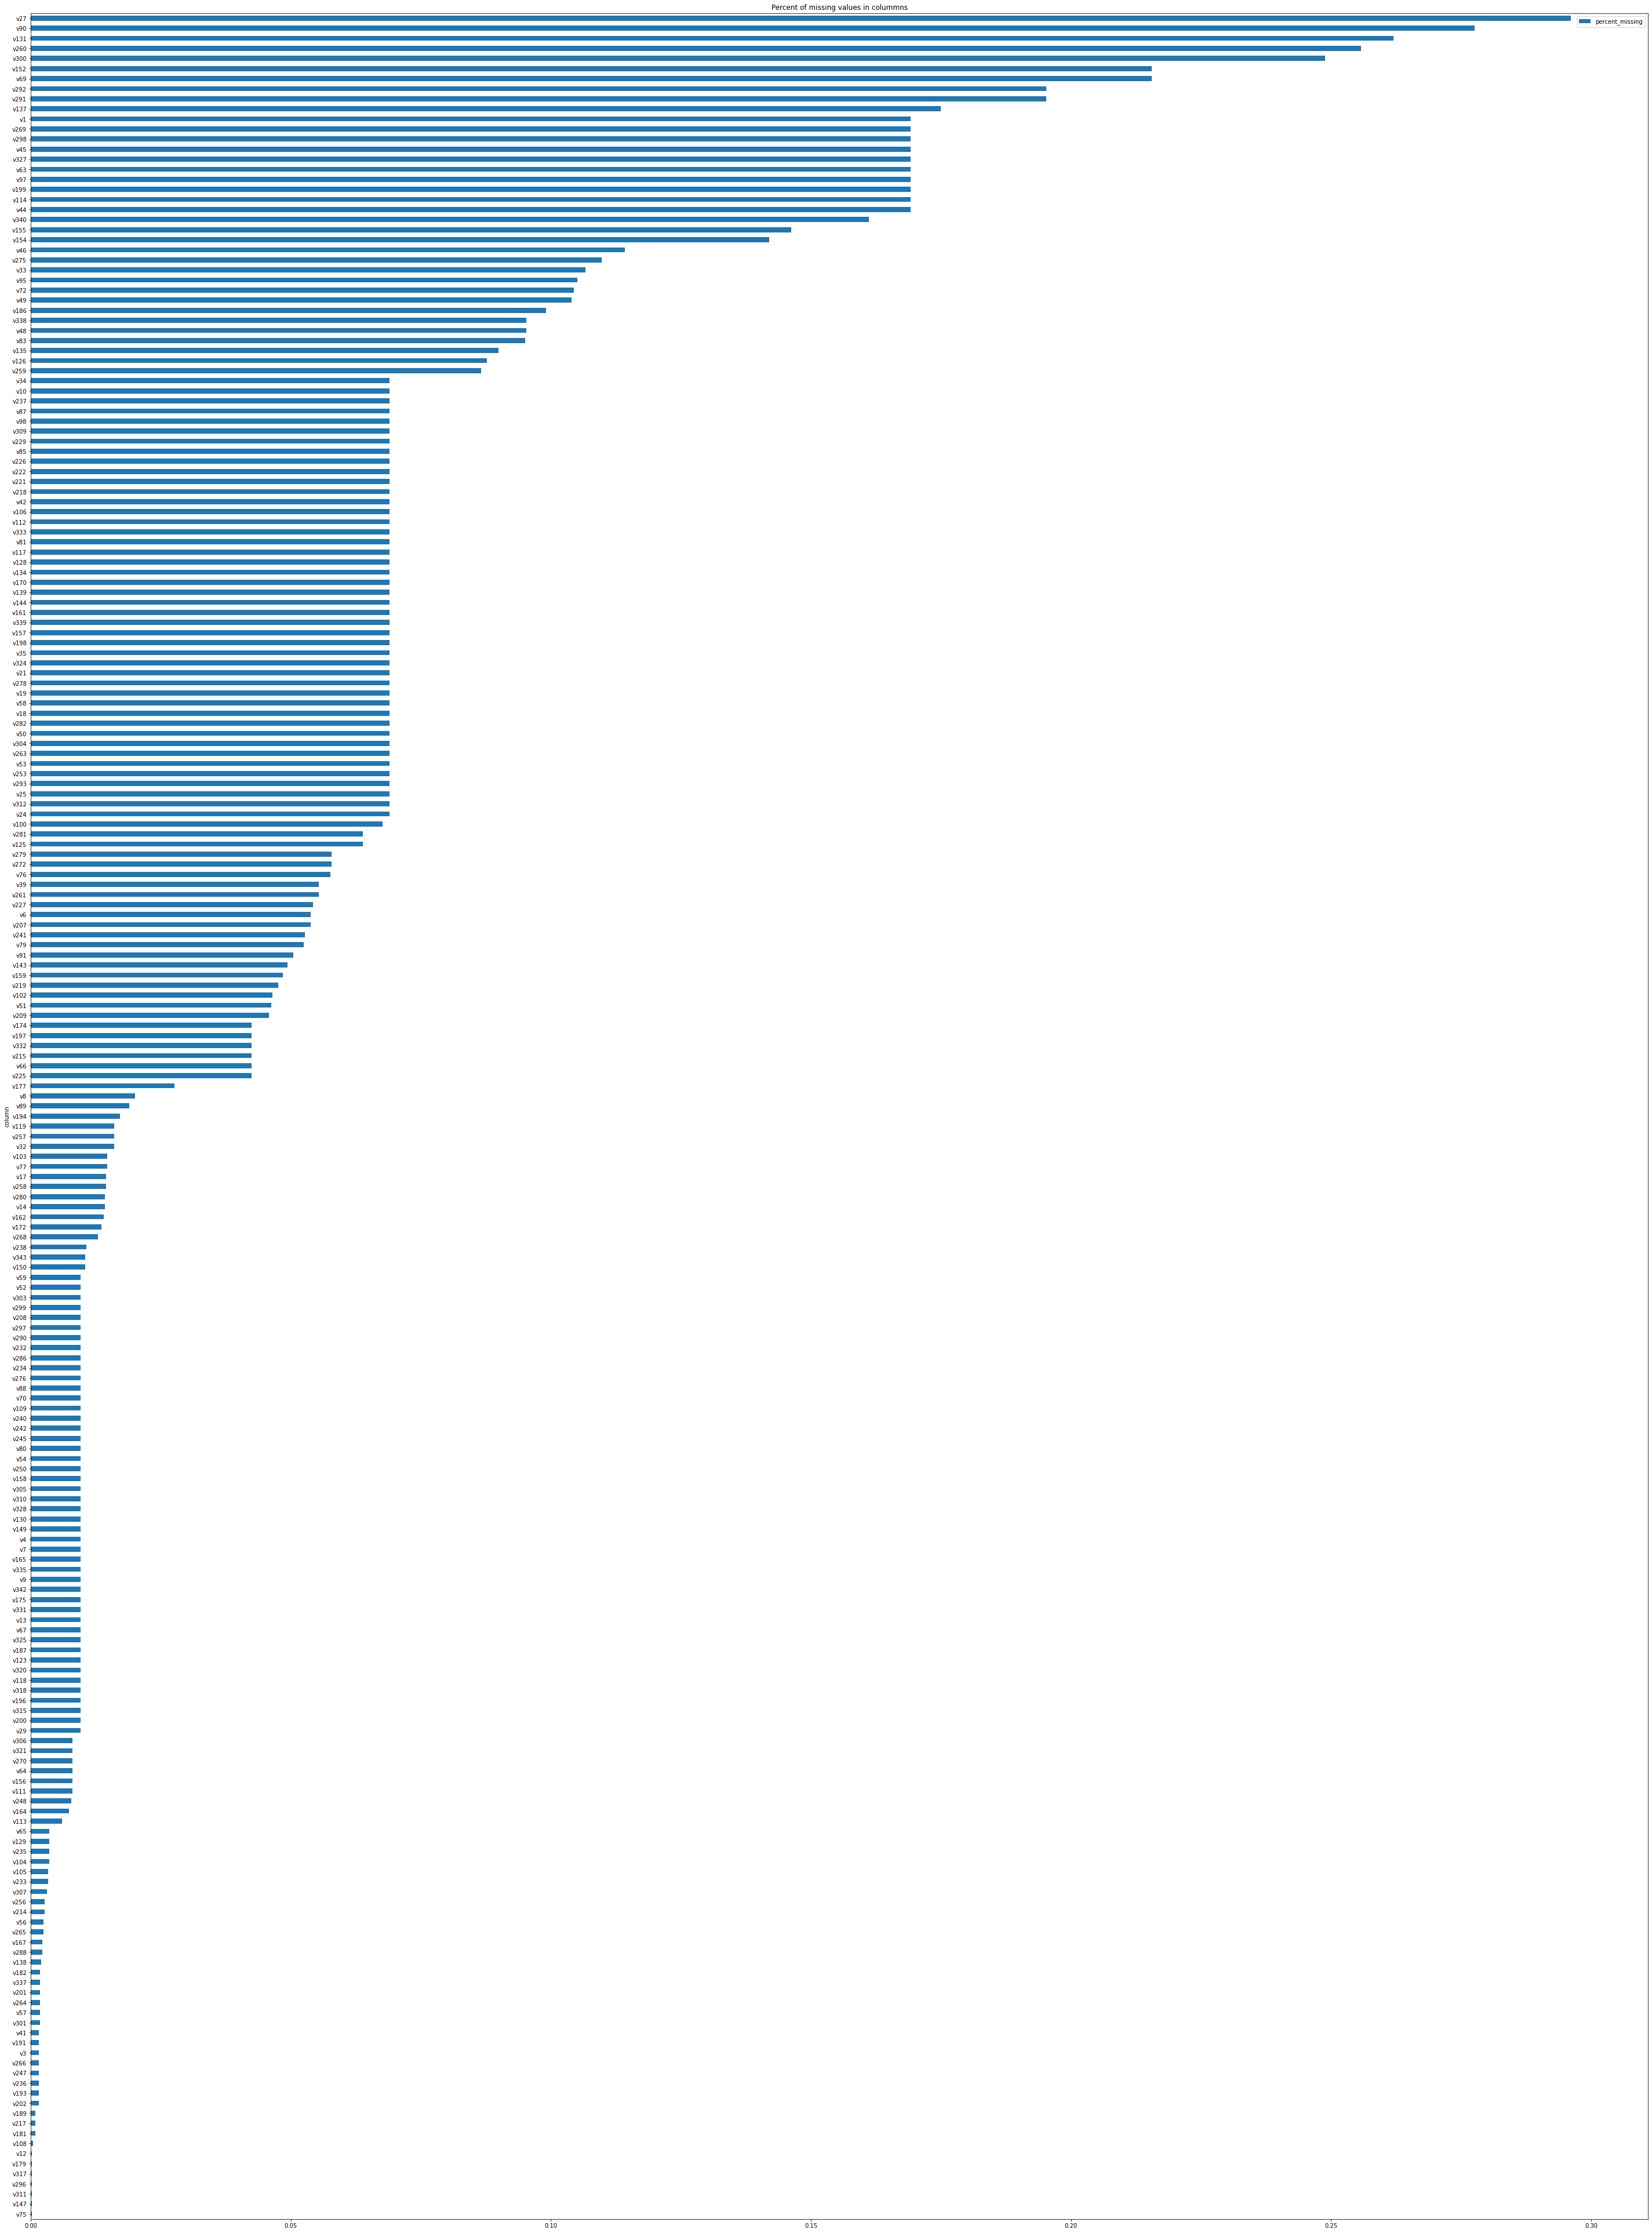

In [121]:
plot_missing_values(train_test_data)

In [35]:
col_list = ['v1','v2','v3','v4','v5','v6','v7','v8','v9','v10',
                    'v11','v12','v13','v14','v15','v16','v17','v18','v19','v20','v21','v22','v23','v24','v25','v26','v27','v28','v29'
                    ,'v30','v31','v32','v33','v34','v35','v36','v37','v39','v40','v41','v42','v43','v44','v45','v46','v47','v48'
                    ,'v49','v50','v51','v52','v53','v54','v55','v56','v57','v58','v59','v60','v61','v62','v63',
                    'v64','v65','v66','v67','v68','v69','v70','v71','v72','v73','v74','v75','v76','v77','v78','v79','v80'
                    ,'v81','v82','v83','v84','v85','v86','v87','v88','v89','v90','v91','v92','v93','v94','v95','v96','v97'
                    ,'v98','v99','v100','v101','v102','v103','v104','v105','v106','v107','v108','v109','v110','v111',
                    'v112','v113','v114','v115','v116','v117','v118','v119','v120','v121','v122','v123','v124','v125',
                    'v126','v127','v128','v129','v130','v131','v132','v133','v134','v135','v136','v137','v138','v139','v140'
                    ,'v141','v142','v143','v144','v145','v146','v147','v148','v149','v150','v151','v152','v153','v154','v155',
                    'v156','v157','v158','v159','v160','v161','v162','v163','v164','v165','v166','v167','v168','v169','v170',
                    'v171','v172','v173','v174','v175','v176','v177','v178','v179','v180','v181','v182','v183','v184','v185','v186'
                    ,'v187','v188','v189','v190','v191','v192','v193','v194','v195','v196','v197','v198','v199','v200',
                    'v201','v202','v203','v204','v205','v206','v207','v208','v209','v210','v211','v212','v213','v214','v215','v216',
                    'v217','v218','v219','v220','v221','v222','v223','v224','v225','v226','v227','v228','v229','v230','v231','v232',
                    'v233','v234','v235','v236','v237','v238','v239','v240','v241','v242','v243','v244','v245','v246','v247','v248',
                    'v249','v250','v251','v252','v253','v254','v255','v256','v257','v258','v259','v260','v261','v262','v263','v264',
                    'v265','v266','v267','v268','v269','v270','v271','v272','v273','v274','v275','v276','v277','v278','v279','v280',
                    'v281','v282','v283','v284','v285','v286','v287','v288','v289','v290','v291','v292','v293','v294','v295','v296',
                    'v297','v298','v299','v300','v301','v302','v303','v304','v305','v306','v307','v308','v309','v310','v311','v312',
                    'v313','v314','v315','v316','v317','v318','v319','v320','v321','v322','v323','v324','v325','v326','v327','v328','v329'
                    ,'v330','v331','v332','v333','v335','v336','v337','v338',
                    'v339','v340','v341','v342','v343']


In [36]:
for col in col_list:
    col_vals = train_test_data[col]
    if sum(col_vals.isnull()) != 0:
        train_test_data[col] = col_vals.fillna(col_vals.median())

In [37]:
train_test_data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4481 entries, 0 to 4480
Data columns (total 343 columns):
 #    Column   Non-Null Count  Dtype  
---   ------   --------------  -----  
 0    label    4481 non-null   object 
 1    default  4481 non-null   float64
 2    v1       4481 non-null   float64
 3    v2       4481 non-null   float64
 4    v3       4481 non-null   float64
 5    v4       4481 non-null   float64
 6    v5       4481 non-null   float64
 7    v6       4481 non-null   float64
 8    v7       4481 non-null   float64
 9    v8       4481 non-null   float64
 10   v9       4481 non-null   float64
 11   v10      4481 non-null   float64
 12   v11      4481 non-null   float64
 13   v12      4481 non-null   float64
 14   v13      4481 non-null   float64
 15   v14      4481 non-null   float64
 16   v15      4481 non-null   float64
 17   v16      4481 non-null   float64
 18   v17      4481 non-null   float64
 19   v18      4481 non-null   float64
 20   v19      4481 non-null   flo

In [38]:
x = train_test_data.drop(["default"], axis = 1)

x.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4481 entries, 0 to 4480
Data columns (total 342 columns):
 #    Column  Non-Null Count  Dtype  
---   ------  --------------  -----  
 0    label   4481 non-null   object 
 1    v1      4481 non-null   float64
 2    v2      4481 non-null   float64
 3    v3      4481 non-null   float64
 4    v4      4481 non-null   float64
 5    v5      4481 non-null   float64
 6    v6      4481 non-null   float64
 7    v7      4481 non-null   float64
 8    v8      4481 non-null   float64
 9    v9      4481 non-null   float64
 10   v10     4481 non-null   float64
 11   v11     4481 non-null   float64
 12   v12     4481 non-null   float64
 13   v13     4481 non-null   float64
 14   v14     4481 non-null   float64
 15   v15     4481 non-null   float64
 16   v16     4481 non-null   float64
 17   v17     4481 non-null   float64
 18   v18     4481 non-null   float64
 19   v19     4481 non-null   float64
 20   v20     4481 non-null   float64
 21   v21     4481

In [39]:
y = train_test_data[["default"]]
y.head()

,default
0,0.0
1,1.0
2,0.0
3,0.0
4,1.0


In [40]:
#plt.figure(figsize=(15, 110))
#ax = sns.heatmap(x.corr(), vmax=.8, square=True, fmt='.2f', annot=True, linecolor='white', linewidths=0.01)
#plt.title('Cross correlation between numerical')
#plt.show()

### Step #4: Transform the Categorical Variables: Creating Dummy Variables

In [41]:

x_categorical = x[["label"]]
x_categorical.head()


,label
0,modeling
1,modeling
2,modeling
3,modeling
4,modeling


In [42]:
for col in x_categorical:
    print(col, ':', len(x_categorical[col].unique()), ' labels')

label : 1  labels


In [43]:
x_one_hot= pd.get_dummies(x_categorical, drop_first=True)

In [44]:
encoder = OneHotEncoder(categories = "auto", handle_unknown = "error", drop='first')
x_one_hot = encoder.fit_transform(x_categorical)
x_one_hot = pd.DataFrame(x_one_hot.toarray())

In [45]:
print("Saving the encoder to  ./output/one_hot_encoder.pkl file ")
pickle.dump(encoder, open('../output/one_hot_encoder.pkl', 'wb'))

Saving the encoder to  ./output/one_hot_encoder.pkl file 


In [46]:
x_one_hot.shape

(4481, 0)

In [47]:
x_final = pd.concat([x.drop(["label"], axis = 1),
                         x_one_hot], axis=1)

In [48]:
x_final.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4481 entries, 0 to 4480
Data columns (total 341 columns):
 #    Column  Non-Null Count  Dtype  
---   ------  --------------  -----  
 0    v1      4481 non-null   float64
 1    v2      4481 non-null   float64
 2    v3      4481 non-null   float64
 3    v4      4481 non-null   float64
 4    v5      4481 non-null   float64
 5    v6      4481 non-null   float64
 6    v7      4481 non-null   float64
 7    v8      4481 non-null   float64
 8    v9      4481 non-null   float64
 9    v10     4481 non-null   float64
 10   v11     4481 non-null   float64
 11   v12     4481 non-null   float64
 12   v13     4481 non-null   float64
 13   v14     4481 non-null   float64
 14   v15     4481 non-null   float64
 15   v16     4481 non-null   float64
 16   v17     4481 non-null   float64
 17   v18     4481 non-null   float64
 18   v19     4481 non-null   float64
 19   v20     4481 non-null   float64
 20   v21     4481 non-null   float64
 21   v22     4481

In [49]:
print('Shape of x_one_hot dataframe: {}'.format(x_final.shape))
print('Number of possitive and negative case in traget variable: \n{}'.format(y.default.value_counts()))


Shape of x_one_hot dataframe: (4481, 341)
Number of possitive and negative case in traget variable: 
0.0    3456
1.0    1025
Name: default, dtype: int64


In [50]:
oversample = SMOTE()
x_final, y = oversample.fit_resample(x_final, y)

In [51]:
from imblearn.under_sampling import RandomUnderSampler 
rus = RandomUnderSampler(random_state=42)

x_final, y = rus.fit_resample(x_final, y)

In [52]:
y.default.value_counts()

0.0    3456
1.0    3456
Name: default, dtype: int64

### Step 5: Split Data into Training and Test

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x_final, y, random_state=0)

In [54]:
print('Shape of x_train: {}'.format(x_train.shape))
print('Shape of y_train: {}'.format(y_train.shape))
print('Shape of x_test: {}'.format(x_test.shape))
print('Shape of y_test: {}'.format(y_test.shape))
print()
print('')
print(y_train['default'].value_counts(normalize=True))
print()
print(y_test['default'].value_counts(normalize=True))

Shape of x_train: (5184, 341)
Shape of y_train: (5184, 1)
Shape of x_test: (1728, 341)
Shape of y_test: (1728, 1)


0.0    0.50463
1.0    0.49537
Name: default, dtype: float64

1.0    0.513889
0.0    0.486111
Name: default, dtype: float64


In [55]:
default_detecting_model = LogisticRegression(random_state=0).fit(x_train, y_train.default)

/home/puneetha/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Step6: Evaluation

In [56]:
test_prob = default_detecting_model.predict_proba(x_test)[:, 1]
test_pred = default_detecting_model.predict(x_test)

/home/puneetha/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


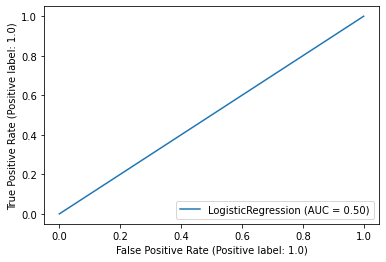

In [57]:
plot_roc_curve(default_detecting_model, x_test, y_test)

/home/puneetha/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


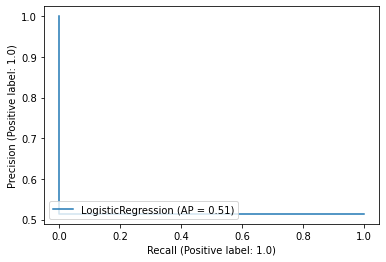

In [58]:
plot_precision_recall_curve(default_detecting_model, x_test, y_test)

In [59]:
print('Log loss = {:.5f}'.format(log_loss(y_test, test_prob)))
print('AUC = {:.5f}'.format(roc_auc_score(y_test, test_prob)))
print('Average Precision = {:.5f}'.format(average_precision_score(y_test, test_prob)))
print('\nUsing 0.5 as threshold:')
print('Accuracy = {:.5f}'.format(accuracy_score(y_test, test_pred)))
print('Precision = {:.5f}'.format(precision_score(y_test, test_pred)))
print('Recall = {:.5f}'.format(recall_score(y_test, test_pred)))
print('F1 score = {:.5f}'.format(f1_score(y_test, test_pred)))

print('\nClassification Report')
print(classification_report(y_test, test_pred))

Log loss = 0.69315
AUC = 0.50000
Average Precision = 0.51389

Using 0.5 as threshold:
Accuracy = 0.48611
Precision = 0.00000
Recall = 0.00000
F1 score = 0.00000

Classification Report
              precision    recall  f1-score   support

         0.0       0.49      1.00      0.65       840
         1.0       0.00      0.00      0.00       888

    accuracy                           0.49      1728
   macro avg       0.24      0.50      0.33      1728
weighted avg       0.24      0.49      0.32      1728



/home/puneetha/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/puneetha/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/puneetha/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/puneetha/anaconda3/lib/python3.9/site-pa

In [60]:
# train a randomforest classifier
default_predictor_rf = RandomForestClassifier(n_jobs=2)
default_predictor_rf.fit(x_train, y_train)

/tmp/ipykernel_88078/1776478146.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  default_predictor_rf.fit(x_train, y_train)


RandomForestClassifier(n_jobs=2)

In [61]:
test_prob = default_predictor_rf.predict_proba(x_test)[:, 1]
test_pred = default_predictor_rf.predict(x_test)

/home/puneetha/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


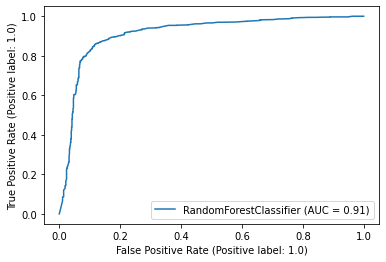

In [62]:
plot_roc_curve(default_predictor_rf, x_test, y_test)

/home/puneetha/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


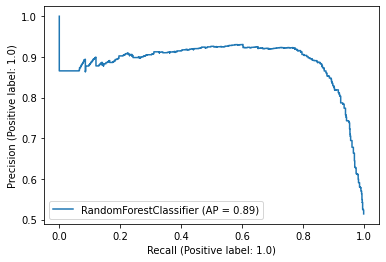

In [63]:
plot_precision_recall_curve(default_predictor_rf, x_test, y_test)

In [64]:
print('Log loss = {:.5f}'.format(log_loss(y_test, test_prob)))
print('AUC = {:.5f}'.format(roc_auc_score(y_test, test_prob)))
print('Average Precision = {:.5f}'.format(average_precision_score(y_test, test_prob)))
print('\nUsing 0.5 as threshold:')
print('Accuracy = {:.5f}'.format(accuracy_score(y_test, test_pred)))
print('Precision = {:.5f}'.format(precision_score(y_test, test_pred)))
print('Recall = {:.5f}'.format(recall_score(y_test, test_pred)))
print('F1 score = {:.5f}'.format(f1_score(y_test, test_pred)))

print('\nClassification Report')
print(classification_report(y_test, test_pred))

Log loss = 0.57373
AUC = 0.91365
Average Precision = 0.88553

Using 0.5 as threshold:
Accuracy = 0.85938
Precision = 0.89963
Recall = 0.81757
F1 score = 0.85664

Classification Report
              precision    recall  f1-score   support

         0.0       0.82      0.90      0.86       840
         1.0       0.90      0.82      0.86       888

    accuracy                           0.86      1728
   macro avg       0.86      0.86      0.86      1728
weighted avg       0.86      0.86      0.86      1728



### Step 7: Save the model

In [65]:
print("Saving the encoder to  ./output/default_predictor_rf.pkl file ")
pickle.dump(default_predictor_rf, open('../output/default_predictor_rf.pkl', 'wb'))

Saving the encoder to  ./output/default_predictor_rf.pkl file 


### Step 8: Apply model 

In [108]:
DATASET_PATH = '../data/dataset(2).csv'
TARGET = "default"
REQUIRED_COLUMNS = ['v1','v2','v3','v4','v5','v6','v7','v8','v9','v10',
                    'v11','v12','v13','v14','v15','v16','v17','v18','v19','v20','v21','v22','v23','v24','v25','v26','v27','v28','v29'
                    ,'v30','v31','v32','v33','v34','v35','v36','v37','v39','v40','v41','v42','v43','v44','v45','v46','v47','v48'
                    ,'v49','v50','v51','v52','v53','v54','v55','v56','v57','v58','v59','v60','v61','v62','v63',
                    'v64','v65','v66','v67','v68','v69','v70','v71','v72','v73','v74','v75','v76','v77','v78','v79','v80'
                    ,'v81','v82','v83','v84','v85','v86','v87','v88','v89','v90','v91','v92','v93','v94','v95','v96','v97'
                    ,'v98','v99','v100','v101','v102','v103','v104','v105','v106','v107','v108','v109','v110','v111',
                    'v112','v113','v114','v115','v116','v117','v118','v119','v120','v121','v122','v123','v124','v125',
                    'v126','v127','v128','v129','v130','v131','v132','v133','v134','v135','v136','v137','v138','v139','v140'
                    ,'v141','v142','v143','v144','v145','v146','v147','v148','v149','v150','v151','v152','v153','v154','v155',
                    'v156','v157','v158','v159','v160','v161','v162','v163','v164','v165','v166','v167','v168','v169','v170',
                    'v171','v172','v173','v174','v175','v176','v177','v178','v179','v180','v181','v182','v183','v184','v185','v186'
                    ,'v187','v188','v189','v190','v191','v192','v193','v194','v195','v196','v197','v198','v199','v200',
                    'v201','v202','v203','v204','v205','v206','v207','v208','v209','v210','v211','v212','v213','v214','v215','v216',
                    'v217','v218','v219','v220','v221','v222','v223','v224','v225','v226','v227','v228','v229','v230','v231','v232',
                    'v233','v234','v235','v236','v237','v238','v239','v240','v241','v242','v243','v244','v245','v246','v247','v248',
                    'v249','v250','v251','v252','v253','v254','v255','v256','v257','v258','v259','v260','v261','v262','v263','v264',
                    'v265','v266','v267','v268','v269','v270','v271','v272','v273','v274','v275','v276','v277','v278','v279','v280',
                    'v281','v282','v283','v284','v285','v286','v287','v288','v289','v290','v291','v292','v293','v294','v295','v296',
                    'v297','v298','v299','v300','v301','v302','v303','v304','v305','v306','v307','v308','v309','v310','v311','v312',
                    'v313','v314','v315','v316','v317','v318','v319','v320','v321','v322','v323','v324','v325','v326','v327','v328','v329'
                    ,'v330','v331','v332','v333','v335','v336','v337','v338',
                    'v339','v340','v341','v342','v343']

def load_data(path):
    """Load data """
    print('Loading the data')
    df = pd.read_csv(path, delimiter=',')
    df1 = df[df["label"]=="oot"]
    print('Successfully uploaded the data')
    
    return df1

def prepare_data(df):
    """function to prepare data in order to pass as an input to our model"""
    print('Preparating the data')
    # 1. Check for default column in test data
    
    if TARGET in df:
        df = df[df["default"].isna()].drop(["default"],axis=1).reset_index(drop=True)
        
    # 2. Check for all required columns
    for col_name in REQUIRED_COLUMNS:
           
        if col_name not in df.columns:
            raise Exception('Required column  is missing:{}', format(col_name))

    print('Writing the data to csv file where required column values are missing')

    df[df[REQUIRED_COLUMNS].isnull().any(axis=1)].to_csv(
        '../output/required_columns_values_missing.csv')
    
    df.dropna(subset=REQUIRED_COLUMNS, inplace=True)
    
    dataset = load_data(DATASET_PATH)
    
    dataset.drop(['v38'], axis = 1, inplace = True)
    dataset.drop(['v334'], axis = 1, inplace = True)
    dataset.drop(dataset.columns[344:358], axis = 1, inplace = True)
    dataset.drop(dataset[dataset.isnull().sum(axis=1)>100].index,axis=0,inplace=True)
    train_test_data = dataset[dataset['label'].notna()].reset_index(drop=True)
    dataset.drop(['label'], axis = 1, inplace = True)
       
    for col in train_test_data:
        col_vals = train_test_data[col]
        if sum(col_vals.isnull()) != 0:
            train_test_data[col] = col_vals.fillna(col_vals.median())
        
    print('Data preparation finished successfully')
    return train_test_data

            
def predict_default(df_final):
    """This function is used to predict the default and write the result to prediction.csv file"""
    
    # load model from disk
    default_predictor_rf = pickle.load(open('../output/default_predictor_rf.pkl', 'rb'))
    
    df_final.drop(['default'], axis = 1, inplace = True)
    df_final.drop(['label'], axis = 1, inplace = True)
    if 'decision_id' in df_final.columns:

        df_final['defualt_prediction'] = default_predictor_rf.predict(
            df_final.drop(["decision_id"], axis=1))
            
        prediction = df_final[['decision_id', 'defualt_prediction']]


    else:
        df_final['defualt_prediction'] = default_predictor_rf.predict(df_final)
        prediction = df_final['defualt_prediction']

    prediction.to_csv('../output/prediction.csv')

    print('Successfully predicted the data, please check: ../output/prediction.csv')


In [109]:
#1. Load Data
df = load_data(DATASET_PATH)
#2. Data prepartion
df_final= prepare_data(df) 
#3. Prediction
predict_default(df_final) 

Loading the data
Successfully uploaded the data
Preparating the data
Writing the data to csv file where required column values are missing
Loading the data
Successfully uploaded the data
Data preparation finished successfully
Successfully predicted the data, please check: ../output/prediction.csv
